In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
from loguru import logger

from src.cifar_autoencoder import CifarDataSet, AutoEncoder, train
from src.cifar_graph_classifier_optimized import Net
from torch.utils.data import DataLoader

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
logger.info(f"device -> {device}")

2021-01-25 21:52:53.509 | INFO     | __main__:<module>:1 - device -> cpu


In [5]:
train_ds = CifarDataSet(
            batch_dir_path="/home/pranjal/pytorch/Datasets", mode="train"
        )
test_ds = CifarDataSet(
            batch_dir_path="/home/pranjal/pytorch/Datasets", mode="test"
        )
sample_ds = CifarDataSet(
            batch_dir_path="/home/pranjal/pytorch/Datasets", mode="sample"
        )

/home/pranjal/pytorch/Datasets/cifar-10-batches-py/data_batch_*
/home/pranjal/pytorch/Datasets/cifar-10-batches-py/data_batch_*
/home/pranjal/pytorch/Datasets/cifar-10-batches-py/data_batch_*


In [6]:
m = AutoEncoder()

In [7]:
tl = DataLoader(test_ds,batch_size=64)

In [8]:
ops = train(m, device, tl, "tmp", 5)

  0%|          | 0/157 [00:00<?, ?it/s]

Saving model for epoch 1
Epoch:1, Loss:0.0320


  0%|          | 0/157 [00:00<?, ?it/s]

Saving model for epoch 2
Epoch:2, Loss:0.0253


  0%|          | 0/157 [00:00<?, ?it/s]

Saving model for epoch 3
Epoch:3, Loss:0.0196


  0%|          | 0/157 [00:00<?, ?it/s]

Saving model for epoch 4
Epoch:4, Loss:0.0128


100%|██████████| 157/157 [04:24<00:00,  1.69s/it]

Saving model for epoch 5
Epoch:5, Loss:0.0170


In [9]:
del tl
del test_ds

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
all_losses = []
index = 0
for i,x in ops[-1]:
    all_losses.append({"counter":index,"epoch":i+1,"iteration":index+1,"loss":x})
    index+=1

In [12]:
loss_df = pd.DataFrame(all_losses)

<AxesSubplot:xlabel='counter', ylabel='loss'>

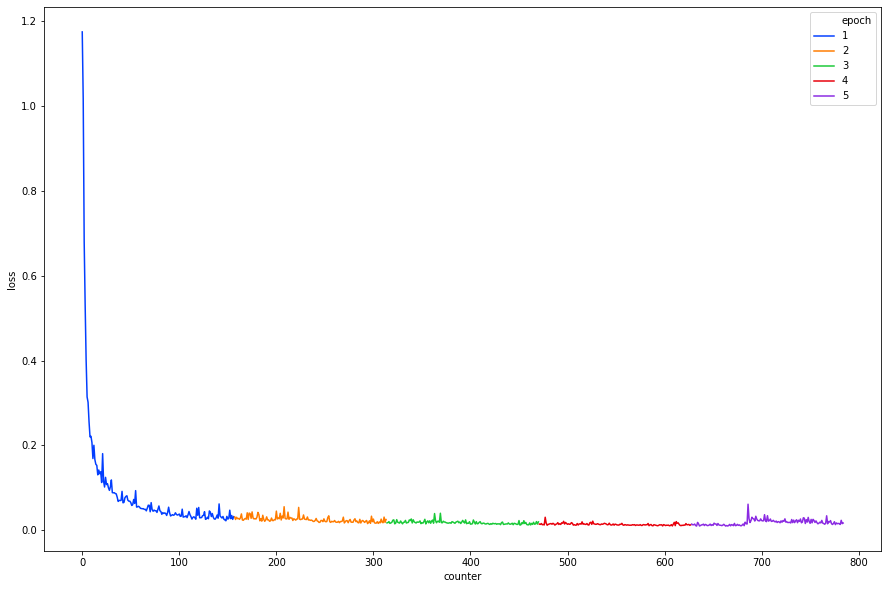

In [13]:
plt.figure(figsize=(15,10))
sns.lineplot(data=loss_df,x="counter",y="loss",hue="epoch",palette=sns.color_palette("bright",n_colors=len(loss_df.epoch.unique())))

In [14]:
imgs = ops[0][-1][1].reshape(-1,3,32,32).numpy()

In [15]:
imgs = imgs.transpose(0,2,3,1)

In [16]:
pred = ops[0][-1][2].reshape(-1,3,32,32).detach().numpy()

In [17]:
pred = pred.transpose(0,2,3,1)

In [18]:
index = 2

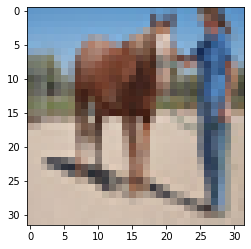

In [19]:
plt.imshow(imgs[index])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


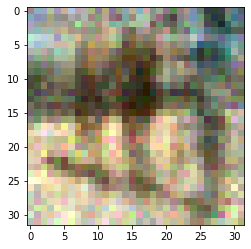

In [20]:
plt.imshow(pred[index])

In [25]:
n = Net(num_classes=10,
        encoder_model=m,
        sample_dataset=sample_ds,
        train_dataset=train_ds,
        model_save_dir="tmp",
        num_epochs=1,
        learning_rate=1e-3,
        seed=42,
        use_graph=True)

2021-01-25 22:29:31.804 | INFO     | src.cifar_graph_classifier_optimized:__init__:52 - Using cpu
2021-01-25 22:29:31.806 | INFO     | src.cifar_graph_classifier_optimized:__init__:62 - Will use graph to augment features


2021-01-25 22:29:51.846 | INFO     | src.cifar_graph_classifier_optimized:sanity_test:359 - label of current x = tensor([6])
2021-01-25 22:29:51.847 | INFO     | src.cifar_graph_classifier_optimized:test_forward_run:204 - x.shape = torch.Size([1, 1024])
2021-01-25 22:29:51.860 | INFO     | src.cifar_graph_classifier_optimized:test_forward_run:205 - x[:,:10] = tensor([[-2.3434, -0.5030,  0.5634,  0.7941, -0.5531,  2.6258, -3.2068,  1.6699,
         -1.2422,  2.2340]])
2021-01-25 22:29:58.514 | INFO     | src.cifar_graph_classifier_optimized:test_forward_run:226 - sample_xs.shape = torch.Size([2048, 1024])
2021-01-25 22:29:58.522 | INFO     | src.cifar_graph_classifier_optimized:test_forward_run:227 - sample_xs[:5,:10] = tensor([[ 0.0916, -0.0457,  0.4637,  0.0179, -1.5480, -0.8962,  0.6457,  0.1326,
         -1.1450, -1.0447],
        [-1.9853,  0.2364,  1.7164,  2.5143, -0.2933,  3.7773, -3.2691,  2.3448,
         -1.6398,  3.9842],
        [-3.4970, -0.9660,  1.9714,  1.4785, -1.6612,

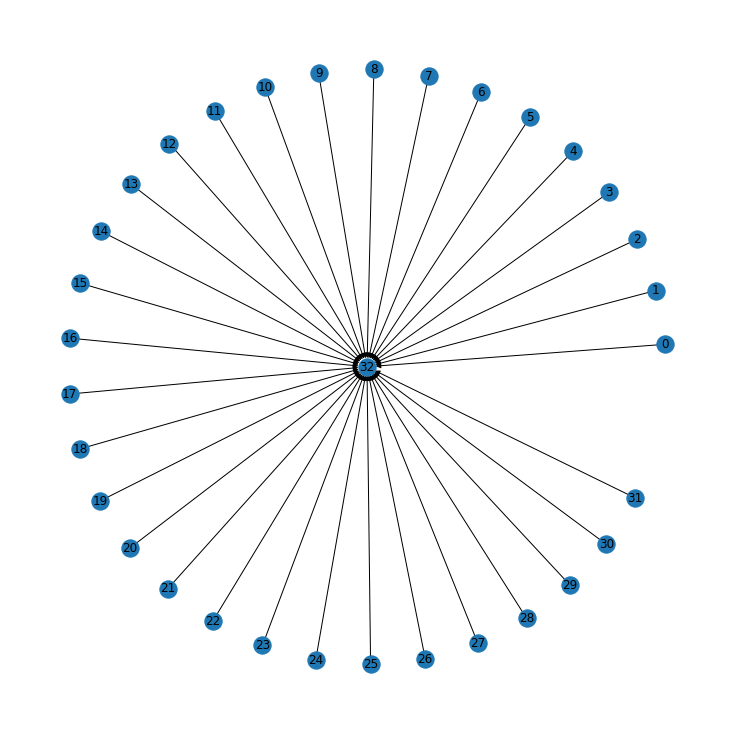

In [28]:
n.sanity_test()

In [27]:
# loss = n.train()

In [28]:
all_losses = []
index = 0
for i,x in enumerate(loss):
    for j,y in enumerate(x):
        all_losses.append({"counter":index,"epoch":i+1,"iteration":j+1,"loss":y})
        index+=1

In [33]:
loss_df = pd.DataFrame(all_losses)

# w/o graph

<AxesSubplot:xlabel='counter', ylabel='loss'>

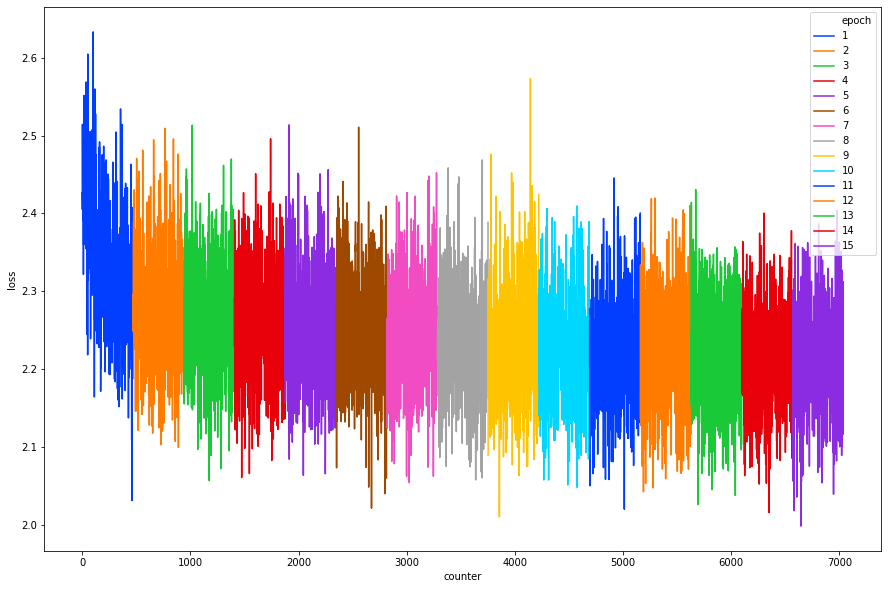

In [28]:
plt.figure(figsize=(15,10))
sns.lineplot(data=loss_df,x="counter",y="loss",hue="epoch",palette=sns.color_palette("bright",n_colors=len(loss_df.epoch.unique())))

# w graph

In [32]:
plt.figure(figsize=(15,10))
sns.lineplot(data=loss_df,x="counter",y="loss",hue="epoch",palette=sns.color_palette("bright",n_colors=len(loss_df.epoch.unique())))

AttributeError: 'DataFrame' object has no attribute 'epoch'

<Figure size 1080x720 with 0 Axes>

In [31]:
clf_test_loader = n.get_encoding(sample_ds, 64)

In [ ]:
from tqdm import tqdm
import torch

In [ ]:
res = []
for data in tqdm(clf_test_loader):
    img, label = data
    recon = n.forward(img,is_train=False)
    _, preds = torch.max(recon, 1)
    bool_tensor = preds == label
    res.append(torch.stack([label,bool_tensor,preds],dim=1))

In [ ]:
all_res = torch.cat(res,dim=0)

In [ ]:
import numpy as np

In [ ]:
df_test_res = pd.DataFrame(all_res.numpy(),columns=["class","res","pred_class"])

# w graph

In [ ]:
df_test_res.groupby("res").count()/df_test_res.shape[0]

In [ ]:
confusion_matrix = pd.crosstab(df_test_res['class'], df_test_res['pred_class'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix